In [3]:
# changes
import statsmodels

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

threshold = 5

In [33]:
daily_stock_data_filename = './../data/daily_data_2005-2021_filtered_nyse.pkl'

daily_stock_data = pd.read_pickle(daily_stock_data_filename)

In [35]:
min_prices = daily_stock_data.groupby('cusip')['prccd'].min()
min_prices = min_prices[min_prices < threshold]

stocks_to_keep = min_prices.index

display(min_prices)

cusip
55645303     2.5400
60505146     2.0000
60505153     0.0005
60505567     4.3500
60505575     4.6000
              ...  
Y7388L103    0.3033
Y7542C130    1.5300
Y8564W103    1.7200
Y8565J101    1.0600
Y8565N300    0.9141
Name: prccd, Length: 1816, dtype: float64

In [43]:
# Save the stocks to keep in a text file
with open('./../data/stocks_to_keep_3.txt', 'w') as f:
    for stock in stocks_to_keep:
        str_to_write = str(stock)[:8] + "\n"
        f.write(str_to_write)

In [36]:
daily_stock_data = daily_stock_data[daily_stock_data['cusip'].isin(stocks_to_keep)]

In [37]:
display(daily_stock_data)

,gvkey,iid,datadate,tic,cusip,ajexdi,cshoc,cshtrd,prccd,prchd,prcld,prcod,prcstd,trfd,exchg,fic,loc,sic
20916,1045,2,2005/01/03,AAR,001765866,1.0000,6000000.0,23600.0,19.00,19.10,18.74,18.83,3.0,1.829594,11.0,USA,USA,4512.0
20917,1045,2,2005/01/04,AAR,001765866,1.0000,6000000.0,13700.0,18.73,19.16,18.73,19.16,3.0,1.829594,11.0,USA,USA,4512.0
20918,1045,2,2005/01/05,AAR,001765866,1.0000,6000000.0,23100.0,18.29,18.85,18.26,18.85,3.0,1.829594,11.0,USA,USA,4512.0
20919,1045,2,2005/01/06,AAR,001765866,1.0000,6000000.0,29900.0,18.30,18.45,18.18,18.45,3.0,1.829594,11.0,USA,USA,4512.0
20920,1045,2,2005/01/07,AAR,001765866,1.0000,6000000.0,19300.0,18.44,18.59,18.30,18.35,3.0,1.829594,11.0,USA,USA,4512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78032808,345699,01C,2021/12/23,ODV.,68828E809,0.3333,133203000.0,24523.0,4.14,4.18,4.08,4.15,3.0,NaN,9.0,CAN,CAN,1040.0
78032809,345699,01C,2021/12/24,ODV.,68828E809,0.3333,133203000.0,15900.0,4.16,4.18,4.14,4.15,3.0,NaN,9.0,CAN,CAN,1040.0
78032810,345699,01C,2021/12/29,ODV.,68828E809,0.3333,133203000.0,64642.0,4.08,4.15,4.06,4.15,3.0,NaN,9.0,CAN,CAN,1040.0
78032811,345699,01C,2021/12/30,ODV.,68828E809,0.3333,133203000.0,21499.0,4.02,4.15,4.02,4.08,3.0,NaN,9.0,CAN,CAN,1040.0


In [38]:
# parse date
daily_stock_data['date'] = pd.to_datetime(daily_stock_data['datadate'], format='%Y/%m/%d')

In [39]:
# Group by cusip and sort dates
daily_stock_data = daily_stock_data.sort_values(['cusip', 'date'])

display(daily_stock_data)

,gvkey,iid,datadate,tic,cusip,ajexdi,cshoc,cshtrd,prccd,prchd,prcld,prcod,prcstd,trfd,exchg,fic,loc,sic,date
624797,1949,1,2005/01/03,BRT,55645303,1.0,7652000.0,4800.0,24.25,24.49,24.20,24.34,3.0,2.376699,11.0,USA,USA,6798.0,2005-01-03
624798,1949,1,2005/01/04,BRT,55645303,1.0,7652000.0,3300.0,24.25,24.34,24.10,24.30,3.0,2.376699,11.0,USA,USA,6798.0,2005-01-04
624799,1949,1,2005/01/05,BRT,55645303,1.0,7652000.0,2400.0,24.30,24.33,24.26,24.26,3.0,2.376699,11.0,USA,USA,6798.0,2005-01-05
624800,1949,1,2005/01/06,BRT,55645303,1.0,7652000.0,3800.0,24.21,24.34,24.21,24.34,3.0,2.376699,11.0,USA,USA,6798.0,2005-01-06
624801,1949,1,2005/01/07,BRT,55645303,1.0,7652000.0,6000.0,23.70,24.20,23.65,24.20,3.0,2.376699,11.0,USA,USA,6798.0,2005-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66498808,179087,01,2021/12/27,TNK,Y8565N300,1.0,29200000.0,234660.0,10.92,11.39,10.90,11.39,3.0,2.645633,11.0,MHL,CAN,4412.0,2021-12-27
66498809,179087,01,2021/12/28,TNK,Y8565N300,1.0,29200000.0,151377.0,10.94,11.25,10.90,11.02,3.0,2.645633,11.0,MHL,CAN,4412.0,2021-12-28
66498810,179087,01,2021/12/29,TNK,Y8565N300,1.0,29200000.0,285404.0,10.66,10.93,10.50,10.86,3.0,2.645633,11.0,MHL,CAN,4412.0,2021-12-29
66498811,179087,01,2021/12/30,TNK,Y8565N300,1.0,29200000.0,225404.0,10.69,10.95,10.64,10.74,3.0,2.645633,11.0,MHL,CAN,4412.0,2021-12-30


In [40]:
def first_time_it_hits_price(stock_data):
    # print(stock_data)
    first_time = stock_data[stock_data['prccd'] < threshold].iloc[0]
    # Make a series with zeroes before the first time it hits the price and ones after
    stock_data['first_time_below_thresh'] = stock_data['date'].apply(lambda x: 1 if x >= first_time['date'] else 0)
    return stock_data


daily_stock_data = daily_stock_data.groupby('cusip').apply(first_time_it_hits_price)

daily_stock_data = daily_stock_data[daily_stock_data['first_time_below_thresh'] == 1]

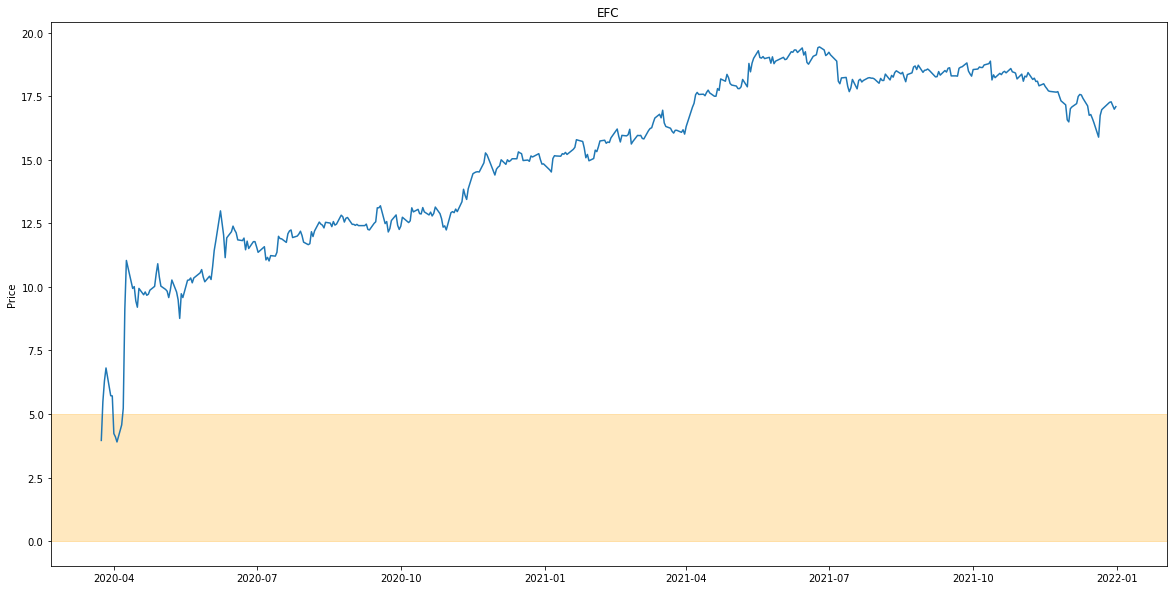

In [61]:
# All stocks in daily stock data
all_stocks = daily_stock_data['cusip'].unique()

# get a random one and plot it's price
random_stock = np.random.choice(all_stocks)
random_stock_data = daily_stock_data[daily_stock_data['cusip'] == random_stock].copy()
# ajexdi_change = ajexdi_curr - ajexdi_prev
random_stock_data['ajexdi_change'] = random_stock_data['ajexdi'] - random_stock_data['ajexdi'].shift(1)




fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(random_stock_data['date'], random_stock_data['prccd'])

splits = random_stock_data[random_stock_data['ajexdi_change'] != 0]

if(len(splits) > 0):
    # Big markers
    colors = ['red' if x > 0 else 'green' for x in splits.iloc[1:]['ajexdi_change']]
    ax.scatter(splits.iloc[1:]['date'], splits.iloc[1:]['prccd'], marker='x', s=100, c=colors)
# Draw horizontal span at 1 alpha = 0.25 in orange
ax.axhspan(0, 5, alpha=0.25, color='orange')

# Add ticker to title
ax.set_title(random_stock_data.iloc[0]['tic'])
# Add y axis label
ax.set_ylabel('Price')
plt.show()

In [42]:
len(all_stocks)

1816

In [62]:
institutional_holdings_filename = './../data/institutional_data_5_thresh.csv'
institutional_holdings = pd.read_csv(institutional_holdings_filename)


display(institutional_holdings)

C:\Users\amrit\AppData\Local\Temp\ipykernel_40580\90189037.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  institutional_holdings = pd.read_csv(institutional_holdings_filename)


,fdate,cusip,mgrno,type,shares,sole,shared,no
0,2005/09/30,00081T10,220,5,7700,7700,0,0
1,2005/09/30,00081T10,650,5,20000,20000,0,0
2,2005/09/30,00081T10,800,5,47,0,0,47
3,2005/09/30,00081T10,1025,5,235,0,0,235
4,2005/09/30,00081T10,1380,1,14009,0,0,14009
...,...,...,...,...,...,...,...,...
6323720,2021/12/31,Y8565N30,75100,5,410247,331040,0,79207
6323721,2021/12/31,Y8565N30,76760,5,335692,335692,0,0
6323722,2021/12/31,Y8565N30,81540,1,308698,282600,0,26098
6323723,2021/12/31,Y8565N30,84900,5,10775,10775,0,0


In [63]:
# groupby cusip and fdate and type and get the sum of shares
institutional_holdings_agg = institutional_holdings.groupby(['cusip', 'fdate', 'type'])['shares'].sum().reset_index()

institutional_holdings_agg

# Just type == 5
institutional_holdings_agg = institutional_holdings_agg[institutional_holdings_agg['type'] == 5]

# Make fdate a datetime
institutional_holdings_agg['fdate'] = pd.to_datetime(institutional_holdings_agg['fdate'], format='%Y/%m/%d')

In [66]:
display(institutional_holdings_agg)

# count the number of unique cusips
len(institutional_holdings_agg['cusip'].unique())

,cusip,fdate,type,shares
4,6050510,2007-09-30,5,1408634026
9,6050510,2007-12-31,5,1602243439
14,6050510,2008-03-31,5,1645029389
19,6050510,2008-06-30,5,1524781388
24,6050510,2008-09-30,5,1338813364
...,...,...,...,...
190232,Y8565N30,2020-12-31,5,6285495
190237,Y8565N30,2021-03-31,5,6789428
190242,Y8565N30,2021-06-30,5,7484166
190247,Y8565N30,2021-09-30,5,6453160


1301

In [65]:
daily_stock_data['cusip_brief'] = daily_stock_data['cusip'].apply(lambda x: str(x)[:8])

In [70]:
# make institution holdings agg daily instead of quarterly by resampling
institutional_holdings_agg_daily = institutional_holdings_agg.set_index('fdate').groupby('cusip')['shares'].resample('D').ffill().reset_index()

display(institutional_holdings_agg_daily)

# count the number of cusip
institutional_holdings_agg_daily['cusip'].nunique()

,cusip,fdate,shares
0,6050510,2007-09-30,1408634026
1,6050510,2007-10-01,1408634026
2,6050510,2007-10-02,1408634026
3,6050510,2007-10-03,1408634026
4,6050510,2007-10-04,1408634026
...,...,...,...
4197399,Y8565N30,2021-12-27,6453160
4197400,Y8565N30,2021-12-28,6453160
4197401,Y8565N30,2021-12-29,6453160
4197402,Y8565N30,2021-12-30,6453160


1301

In [71]:
# Merge with daily stock data
daily_stock_data_merged = daily_stock_data.merge(institutional_holdings_agg_daily, how='left', left_on=['cusip_brief', 'date'], right_on=['cusip', 'fdate'])

In [74]:
len(daily_stock_data_merged)

1935918

In [72]:
# drop na cusip_y
daily_stock_data_merged = daily_stock_data_merged.dropna(subset=['cusip_y'])

# count the number of cusip
daily_stock_data_merged['cusip_y'].nunique()

1278

In [75]:


display(daily_stock_data_merged.dtypes)
# Count the number of missing values
display(daily_stock_data_merged.isna().sum())

daily_stock_data_merged

gvkey                               int64
iid                                object
datadate                           object
tic                                object
cusip_x                            object
ajexdi                            float64
cshoc                             float64
cshtrd                            float64
prccd                             float64
prchd                             float64
prcld                             float64
prcod                             float64
prcstd                            float64
trfd                              float64
exchg                             float64
fic                                object
loc                                object
sic                               float64
date                       datetime64[ns]
first_time_below_thresh             int64
cusip_brief                        object
cusip_y                            object
fdate                      datetime64[ns]
shares                            

gvkey                           0
iid                             0
datadate                        0
tic                             0
cusip_x                         0
ajexdi                         52
cshoc                        2636
cshtrd                         63
prccd                          52
prchd                         117
prcld                          52
prcod                       14458
prcstd                         52
trfd                       266686
exchg                           0
fic                          2029
loc                          1320
sic                           251
date                            0
first_time_below_thresh         0
cusip_brief                     0
cusip_y                         0
fdate                           0
shares                          0
dtype: int64

,gvkey,iid,datadate,tic,cusip_x,ajexdi,cshoc,cshtrd,prccd,prchd,...,exchg,fic,loc,sic,date,first_time_below_thresh,cusip_brief,cusip_y,fdate,shares
23027,3007,1,2008/11/20,EAT,109641100,1.0,101840000.0,4012410.0,4.75,5.38,...,11.0,USA,USA,5812.0,2008-11-20,1,10964110,10964110,2008-11-20,84696123.0
23028,3007,1,2008/11/21,EAT,109641100,1.0,101840000.0,9419709.0,3.99,4.88,...,11.0,USA,USA,5812.0,2008-11-21,1,10964110,10964110,2008-11-21,84696123.0
23029,3007,1,2008/11/24,EAT,109641100,1.0,101840000.0,5459167.0,4.95,5.01,...,11.0,USA,USA,5812.0,2008-11-24,1,10964110,10964110,2008-11-24,84696123.0
23030,3007,1,2008/11/25,EAT,109641100,1.0,101840000.0,4945304.0,6.27,6.31,...,11.0,USA,USA,5812.0,2008-11-25,1,10964110,10964110,2008-11-25,84696123.0
23031,3007,1,2008/11/26,EAT,109641100,1.0,101840000.0,2193077.0,6.56,6.66,...,11.0,USA,USA,5812.0,2008-11-26,1,10964110,10964110,2008-11-26,84696123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745346,179087,01,2021/12/27,TNK,Y8565N300,1.0,29200000.0,234660.0,10.92,11.39,...,11.0,MHL,CAN,4412.0,2021-12-27,1,Y8565N30,Y8565N30,2021-12-27,6453160.0
2745347,179087,01,2021/12/28,TNK,Y8565N300,1.0,29200000.0,151377.0,10.94,11.25,...,11.0,MHL,CAN,4412.0,2021-12-28,1,Y8565N30,Y8565N30,2021-12-28,6453160.0
2745348,179087,01,2021/12/29,TNK,Y8565N300,1.0,29200000.0,285404.0,10.66,10.93,...,11.0,MHL,CAN,4412.0,2021-12-29,1,Y8565N30,Y8565N30,2021-12-29,6453160.0
2745349,179087,01,2021/12/30,TNK,Y8565N300,1.0,29200000.0,225404.0,10.69,10.95,...,11.0,MHL,CAN,4412.0,2021-12-30,1,Y8565N30,Y8565N30,2021-12-30,6453160.0


In [76]:
# ownership percentage. shares / cshoc

daily_stock_data_merged['instituional_ownership_perc'] = daily_stock_data_merged['shares'] / daily_stock_data_merged['cshoc']



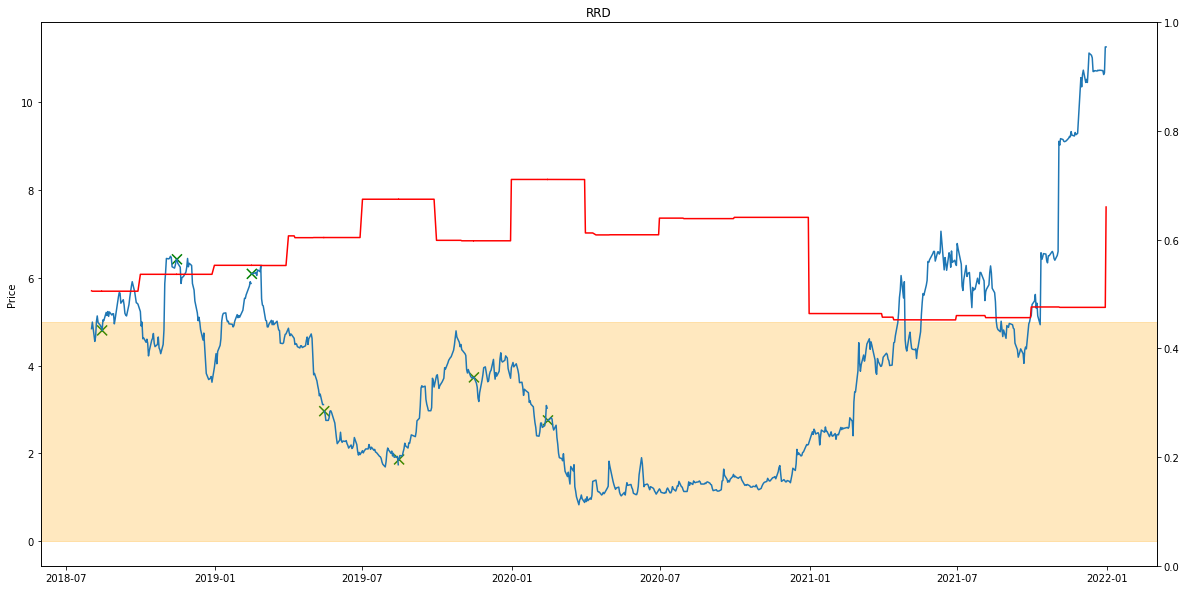

In [115]:
# All stocks in daily stock data
all_stocks = daily_stock_data_merged['cusip_x'].unique()

# get a random one and plot it's price
random_stock = np.random.choice(all_stocks)
random_stock_data = daily_stock_data_merged[daily_stock_data_merged['cusip_x'] == random_stock].copy()
# ajexdi_change = ajexdi_curr - ajexdi_prev
random_stock_data['ajexdi_change'] = random_stock_data['ajexdi'] - random_stock_data['ajexdi'].shift(1)




fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(random_stock_data['date'], random_stock_data['prccd'])

splits = random_stock_data[random_stock_data['ajexdi_change'] != 0]

if(len(splits) > 0):
    # Big markers
    colors = ['red' if x > 0 else 'green' for x in splits.iloc[1:]['ajexdi_change']]
    ax.scatter(splits.iloc[1:]['date'], splits.iloc[1:]['prccd'], marker='x', s=100, c=colors)
# Draw horizontal span at 1 alpha = 0.25 in orange
ax.axhspan(0, 5, alpha=0.25, color='orange')

# Plot institutional ownership with twin y 
ax2 = ax.twinx()
ax2.plot(random_stock_data['date'], random_stock_data['instituional_ownership_perc'], color='red')
ax2.set_ylim(0, 1)
# Add ticker to title
ax.set_title(random_stock_data.iloc[0]['tic'])
# Add y axis label
ax.set_ylabel('Price')
plt.show()

In [116]:
# Final data export to pkl
daily_stock_data_merged.to_pickle('./../data/daily_stock_data_merged.pkl')